<a href="https://colab.research.google.com/github/Vaish24navi/solar_pred/blob/main/py_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and load the dataset












we have imported the internship dataset from the
[website](https://power.larc.nasa.gov)
. The parameters include:


*   Duration: May 2023
*   Temporal average: hourly

*   T2M: Temperature
*   QV2M: Specific Humidity


*   SZA: Integrated Solar Zenith Angle
*   ALLSKY_SRF_ALB: Allsky Surface Albedo


*   PS: Surface Pressure



In [13]:
import pandas as pd
df=pd.read_csv("/content/internship.csv")
df

,YEAR,MO,DY,HR,T2M,QV2M,SZA,ALLSKY_SRF_ALB,PS
0,2023,5,1,5,26.58,20.26,-999,-999,100.04
1,2023,5,1,6,27.46,20.20,-999,-999,100.12
2,2023,5,1,7,28.44,19.84,-999,-999,100.21
3,2023,5,1,8,29.48,18.98,-999,-999,100.24
4,2023,5,1,9,30.53,18.19,-999,-999,100.22
...,...,...,...,...,...,...,...,...,...
739,2023,6,1,0,27.17,21.00,-999,-999,100.03
740,2023,6,1,1,26.95,20.81,-999,-999,100.01
741,2023,6,1,2,26.68,20.63,-999,-999,99.99
742,2023,6,1,3,26.37,20.32,-999,-999,99.97


# Preprocessing

we first check is there is any null values from the data set

In [14]:
df.isnull().sum()

YEAR              0
MO                0
DY                0
HR                0
T2M               0
QV2M              0
SZA               0
ALLSKY_SRF_ALB    0
PS                0
dtype: int64

since there is no null values, we proceed with the next step. Now, we use the formula for extra terrestrial radiation
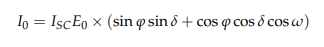
where


*   I0 is a constant value = 1367 W/m2
*   phi is the geographical latitude, which is the latitude of Neyveli- 11.5390


*   del is the solar inclination
*   omega is the hour angle
*   E0 is the correction factor





**Eccentricity correction**
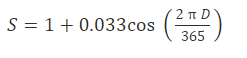

In [15]:
import math
#for month May D is 5
s= 1+ 0.033* math.cos((2*math.pi*5)/365)
s

1.032877839772842

**Solar declination angle**
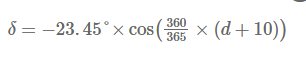

In [16]:
#the start of the day from may 1 is d = 121 for 2023
de = []
for d in range (121,153):
  de.append((-23.45*math.cos(360*(d+10)/365)))
de

[21.597230241890173,
 4.297739960220312,
 -16.854431361325194,
 -22.897557290479305,
 -8.414316885460462,
 13.611883174673773,
 23.435799078607065,
 12.250845297494052,
 -9.916299085417391,
 -23.194041637193997,
 -15.67963639017198,
 5.8906769368407925,
 22.1803312298817,
 18.586571826774644,
 -1.6689990251644016,
 -20.428406554208454,
 -20.874901870146953,
 -2.608227150489084,
 17.996575837372117,
 22.468465444458765,
 6.79864531242709,
 -14.965776199508591,
 -23.31422495726366,
 -10.762788360475117,
 11.436879873499583,
 23.384031516938524,
 14.368720169353375,
 -7.527336936732429,
 -22.67556179486202,
 -17.496426737266244,
 3.367266292697763,
 21.212395351326467]

**hour angle**
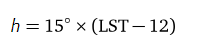

In [17]:
h=[]
for lst in range(24):
  h.append(15*(lst-12))
h

[-180,
 -165,
 -150,
 -135,
 -120,
 -105,
 -90,
 -75,
 -60,
 -45,
 -30,
 -15,
 0,
 15,
 30,
 45,
 60,
 75,
 90,
 105,
 120,
 135,
 150,
 165]

**Extra terrestrial radiation**

In [18]:
I0=[]
for i in range(31):
  for j in range(24):
    I0.append(1367*s*(math.sin(11.5390)*math.sin(de[i])+(math.cos(11.5390)*math.cos(de[i])*math.cos(h[j]))))
I0


[-60.391967477182355,
 -419.1285159910974,
 -935.2577491567897,
 207.67307917526284,
 -1012.7391586942065,
 -301.40513539741823,
 -161.77661653555933,
 -1085.2588359718156,
 178.22920485784869,
 -818.0017610258327,
 -567.8405554604942,
 48.30152215483009,
 -1138.0110613466754,
 48.30152215483009,
 -567.8405554604942,
 -818.0017610258327,
 178.22920485784869,
 -1085.2588359718156,
 -161.77661653555933,
 -301.40513539741823,
 -1012.7391586942065,
 207.67307917526284,
 -935.2577491567897,
 -419.1285159910974,
 1282.1499507409565,
 1125.6394299783137,
 900.4612166119313,
 1399.1020712417449,
 866.6574243684033,
 1177.0000947307117,
 1237.9175905669028,
 835.0183496678304,
 1386.2562206536786,
 951.6179661567925,
 1060.7589519856256,
 1329.5710310191912,
 812.0034706458583,
 1329.5710310191912,
 1060.7589519856256,
 951.6179661567925,
 1386.2562206536786,
 835.0183496678304,
 1237.9175905669028,
 1177.0000947307117,
 866.6574243684033,
 1399.1020712417449,
 900.4612166119313,
 1125.63942997

now we add the result to the dataframe


In [19]:
df['ETI'] = I0
df

,YEAR,MO,DY,HR,T2M,QV2M,SZA,ALLSKY_SRF_ALB,PS,ETI
0,2023,5,1,5,26.58,20.26,-999,-999,100.04,-60.391967
1,2023,5,1,6,27.46,20.20,-999,-999,100.12,-419.128516
2,2023,5,1,7,28.44,19.84,-999,-999,100.21,-935.257749
3,2023,5,1,8,29.48,18.98,-999,-999,100.24,207.673079
4,2023,5,1,9,30.53,18.19,-999,-999,100.22,-1012.739159
...,...,...,...,...,...,...,...,...,...,...
739,2023,6,1,0,27.17,21.00,-999,-999,100.03,441.884777
740,2023,6,1,1,26.95,20.81,-999,-999,100.01,-308.914383
741,2023,6,1,2,26.68,20.63,-999,-999,99.99,979.206884
742,2023,6,1,3,26.37,20.32,-999,-999,99.97,-227.134269


# Model to calculate r2 score

# lightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# split data into X and y
column_list = list(set(df.columns)-set(['YEAR'])-set(['MO'])-set(['DY']))
feature_list = list(set(df.columns)-set(['ETI']))
X=df[feature_list].values
Y=df['ETI'].values

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

lgbm = LGBMRegressor(random_state=5)
lgbm.fit(X, Y)
y_pred = lgbm.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)
print(math.sqrt(mse))


0.8762082631738694
347.77136530435047


lightGBM has a good r2 score but not sufficient for our dataset

# XGboost

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# split data into X and y
column_list = list(set(df.columns)-set(['YEAR'])-set(['MO'])-set(['DY']))
feature_list = list(set(df.columns)-set(['ETI']))
X1=df[feature_list].values
Y1=df['ETI'].values

# split data into train and test sets
seed = 7
test_size = 0.33
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=test_size, random_state=seed)

xg = XGBRegressor(random_state=5)
xg.fit(X1, Y1)
y_pred1 = xg.predict(X_test1)
from sklearn.metrics import r2_score, mean_squared_error
r21 = r2_score(y_test1,y_pred1)
mse1 = mean_squared_error(y_test1,y_pred1)
print(r21)
print(math.sqrt(mse1))

0.9971357511887475
52.899718741417274


XGBoost leads our model, with 99 r2 score

# random decision forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# split data into X and y
column_list = list(set(df.columns)-set(['YEAR'])-set(['MO'])-set(['DY']))
feature_list = list(set(df.columns)-set(['ETI']))
X=df[feature_list].values
Y=df['ETI'].values

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

rf = RandomForestRegressor(random_state=5)
rf.fit(X, Y)
y_pred = rf.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)
print(math.sqrt(mse))

0.9433004318201262
235.36282486255337


random forest provides a promising accuracy

# SVM


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# split data into X and y
column_list = list(set(df.columns)-set(['YEAR'])-set(['MO'])-set(['DY']))
feature_list = list(set(df.columns)-set(['ETI']))
X=df[feature_list].values
Y=df['ETI'].values

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

s = SVR()
s.fit(X, Y)
y_pred = s.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)
print(math.sqrt(mse))

-0.05435248154578387
1014.941251624949


So, SVM doesn't fit the dataset we chose

# Display the model

Now we visualise the regression model as-

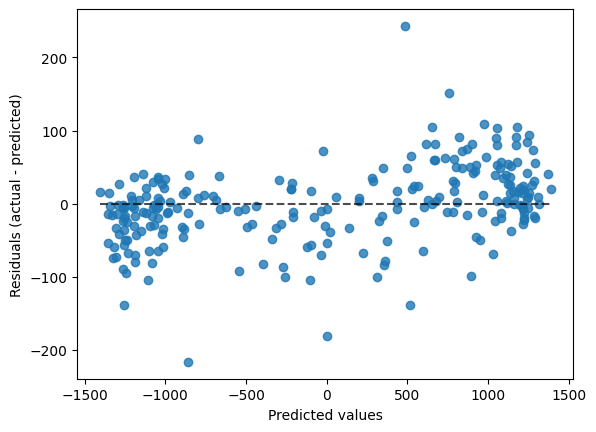

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
p = PredictionErrorDisplay(y_true=y_test1,y_pred= y_pred1)
p.plot()


# introduction of reinforcement learning

Reinforcement learning is a pretty tricky task for a boosting regression model with no set of actions and Rewards. Therefore, we created another column called "Reward_column" in order to make the model learn. We also used Q reinforcement technique for implementing reinforcement learning.

In [57]:
import pandas as pd
import xgboost as xgb
import numpy as np

# Load the preprocessed dataset from CSV

reward = 1.0 / (1.0 + mse1)
r=[]
for x in Y1:
  if reward > x:
    r.append(-1)
  else:
    r.append(1)

df['reward_column']= r
gamma =0.7
dataset=df
# Extract the columns for states, next states, and rewards
states = dataset[['HR','T2M','QV2M','SZA','ALLSKY_SRF_ALB','PS','ETI']]
next_states = dataset['ETI']
rewards = dataset['reward_column']

def q_value_function(states):
    # Initialize a lookup table for Q-values
    q_values = {}

    # Iterate over the states
    for state in states:
        # Check if the state is already in the lookup table
        if state in q_values:
            # Return the corresponding Q-value
            q_value = q_values[state]
        else:
            # Assign a default Q-value if the state is not in the lookup table
            q_value = 0.0

        # Store or update the Q-value in the lookup table
        q_values[state] = q_value

    return q_values

a = q_value_function(next_states)

# Create the target labels (Q-values) for regression
q_values = rewards + gamma * (max(a))

# Convert the training data to XGBoost format
data = states
labels = q_values

# Create an XGBoost regression model
model = xgb.XGBRegressor()

# Train the model
model.fit(data, labels)

# Use the trained model for Q-value prediction
def predict_q_value(state):
    # Create a DataFrame with the input state
    data = pd.DataFrame([state], columns=[['HR','T2M','QV2M','SZA','ALLSKY_SRF_ALB','PS','ETI']])

    # Predict the Q-value using the trained model
    q_value = model.predict(data)
    return q_value
a=[]
for s in states.values:
  a.append(predict_q_value(s))

d = pd.DataFrame(a, columns= ['predicted'])
d['actual'] = labels
d


,predicted,actual
0,986.156860,986.156925
1,986.156860,986.156925
2,986.156860,986.156925
3,988.156799,988.156925
4,986.156860,986.156925
...,...,...
739,988.156799,988.156925
740,986.156860,986.156925
741,988.156799,988.156925
742,986.156860,986.156925


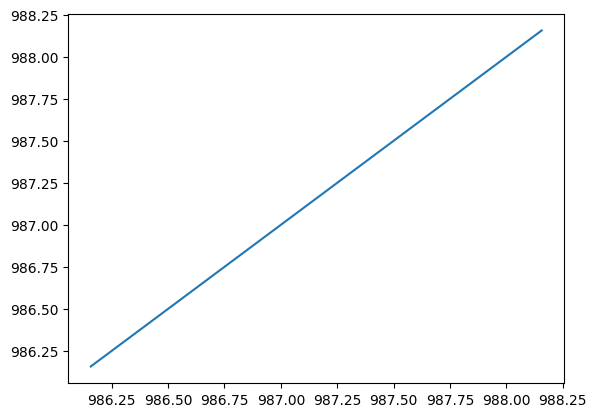

In [58]:
import matplotlib.pyplot as plt
plt.plot(d['predicted'],d['actual'])

Therefore there isn't much change in accuracy